x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6695 - loss: 0.8847 - val_accuracy: 0.8405 - val_loss: 0.4160
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8503 - loss: 0.4178 - val_accuracy: 0.8802 - val_loss: 0.3301
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8764 - loss: 0.3460 - val_accuracy: 0.8860 - val_loss: 0.3096
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8959 - loss: 0.2964 - val_accuracy: 0.8894 - val_loss: 0.2965
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9033 - loss: 0.2717 - val_accuracy: 0.9043 - val_loss: 0.2700
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9137 - loss: 0.2433 - val_accuracy: 0.9061 - val_loss: 0.2659
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9143 - loss: 0.2317 - val_accuracy: 0.9061 - val_loss: 0.2601
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9205 - loss: 0.2125 - 

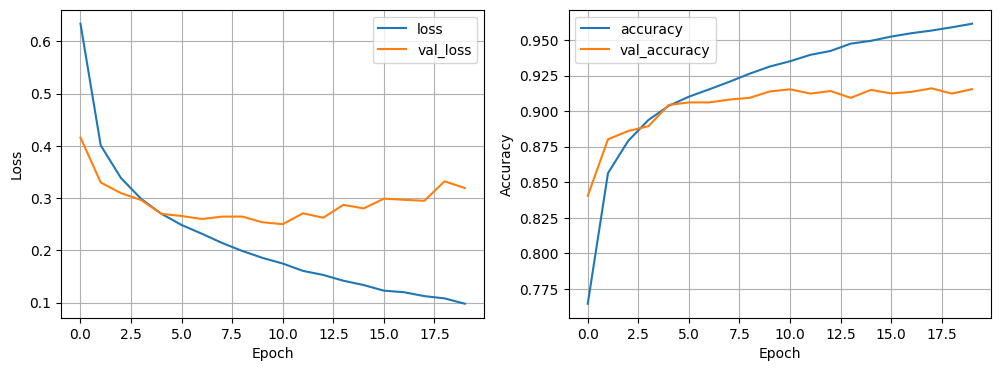

313/313 - 1s - 3ms/step - accuracy: 0.9154 - loss: 0.3195
Test accuracy: 0.9154


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Załadowanie danych Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizacja wartości pikseli
x_train, x_test = x_train / 255.0, x_test / 255.0

# Dodanie wymiaru dla kanału (1 kanał dla obrazów grayscale)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Sprawdzenie kształtu danych
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Wyświetlenie podsumowania modelu
model.summary()

history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_test, y_test))

# Wykresy strat i dokładności
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


# Wnisek części pierwszej


In [9]:
Uzyskaliśmy rezultat na poziomie 91.5% więc poprawiliśmy nasz wynik o 2.5% co jest sporą różnicą. 


SyntaxError: invalid syntax (844556846.py, line 1)

# Część druga

x_train shape: (60000, 32, 32, 3)
y_train shape: (60000,)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000,)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 196s 104ms/step - accuracy: 0.6852 - loss: 0.8909 - val_accuracy: 0.8299 - val_loss: 0.4684
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 204s 109ms/step - accuracy: 0.8179 - loss: 0.5126 - val_accuracy: 0.8421 - val_loss: 0.4298
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 209s 111ms/step - accuracy: 0.8317 - loss: 0.4639 - val_accuracy: 0.8473 - val_loss: 0.4141
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 213s 114ms/step - accuracy: 0.8393 - loss: 0.4435 - val_accuracy: 0.8503 - val_loss: 0.4004
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 213s 113ms/step - accuracy: 0.8471 - loss: 0.4227 - val_accuracy: 0.8535 - val_loss: 0.3997
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 212s 113ms/step - accuracy: 0.8454 - loss: 0.4249 - val_accuracy: 0.8553 - val_loss: 0.3905
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 219s 117ms/step - accuracy: 0.8532 - loss: 0.4013 - val_accuracy: 0.8557 - val_loss: 0.3865
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 217s 116ms/step - ac

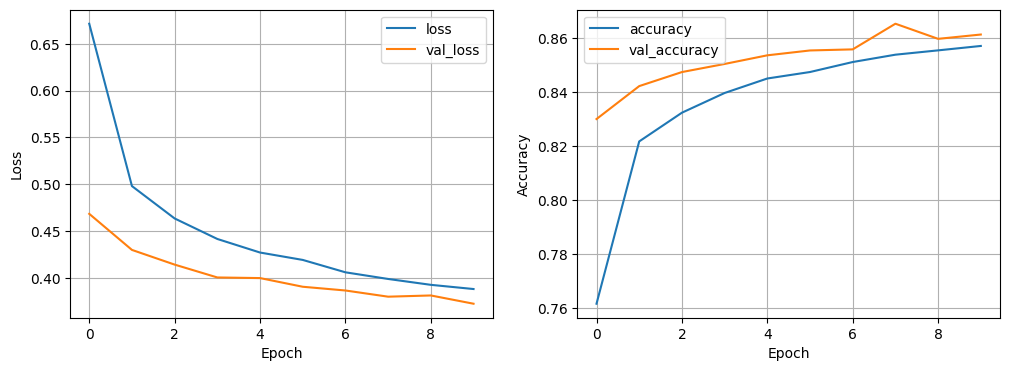

313/313 - 31s - 99ms/step - accuracy: 0.8612 - loss: 0.3723
Test accuracy: 0.8612


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np

# Załadowanie danych Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizacja wartości pikseli
x_train, x_test = x_train / 255.0, x_test / 255.0

# Dodanie wymiaru dla kanału (1 kanał dla obrazów grayscale)
x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

# Zmiana rozmiaru obrazów na 32x32
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# Sprawdzenie kształtu danych
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Załadowanie bazy VGG16 bez warstwy głowy (fully connected layers)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Zamrożenie wag warstw bazy VGG16
vgg_base.trainable = False

# Rozbudowa modelu o własne warstwy fully connected
model = models.Sequential([
    layers.InputLayer(input_shape=(32, 32, 3)),
    vgg_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Zmniejszona liczba neuronów
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Wyświetlenie podsumowania modelu
model.summary()

# Trenowanie modelu
history = model.fit(x_train, y_train, epochs=10, batch_size=32,  # Zmniejszona liczba epok i batch_size
                    validation_data=(x_test, y_test))

# Wykresy strat i dokładności
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

# Ocena modelu na danych testowych
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


# Część 2 V2

x_train shape: (60000, 32, 32, 3)
y_train shape: (60000,)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000,)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 7,347,210 (28.03 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 370s 394ms/step - accuracy: 0.7772 - loss: 0.6414 - val_accuracy: 0.8787 - val_loss: 0.3548
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 397s 424ms/step - accuracy: 0.8855 - loss: 0.3327 - val_accuracy: 0.8843 - val_loss: 0.3184
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 411s 439ms/step - accuracy: 0.8968 - loss: 0.2947 - val_accuracy: 0.9009 - val_loss: 0.2934
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 436s 464ms/step - accuracy: 0.9059 - loss: 0.2684 - val_accuracy: 0.8899 - val_loss: 0.3311
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 432s 461ms/step - accuracy: 0.9129 - loss: 0.2485 - val_accuracy: 0.8987 - val_loss: 0.3252
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 468s 499ms/step - accuracy: 0.9152 - loss: 0.2383 - val_accuracy: 0.8972 - val_loss: 0.2961
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 597s 636ms/step - accuracy: 0.9177 - loss: 0.2309 - val_accuracy: 0.9027 - val_loss: 0.2927
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2145s 2s/step - accuracy: 0.9207 - l

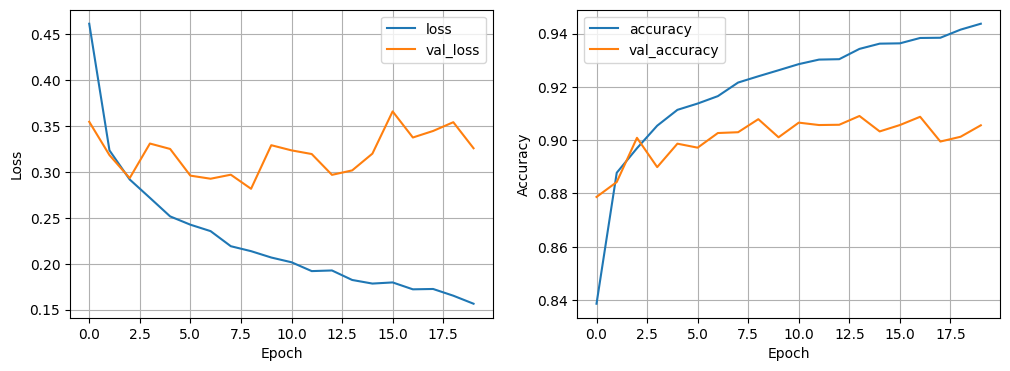

313/313 - 209s - 666ms/step - accuracy: 0.9056 - loss: 0.3259
Test accuracy: 0.9056


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np

# Załadowanie danych Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizacja wartości pikseli
x_train, x_test = x_train / 255.0, x_test / 255.0

# Dodanie wymiaru dla kanału (1 kanał dla obrazów grayscale)
x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

# Zmiana rozmiaru obrazów na 32x32
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# Sprawdzenie kształtu danych
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Załadowanie bazy VGG16 bez warstwy głowy (fully connected layers)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Zamrożenie niektórych warstw VGG16
for layer in vgg_base.layers[:-4]:  # Odmrażamy ostatnie 4 warstwy
    layer.trainable = False

# Rozbudowa modelu o własne warstwy fully connected
model = models.Sequential([
    layers.InputLayer(input_shape=(32, 32, 3)),
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),  # Zwiększona liczba neuronów
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Wyświetlenie podsumowania modelu
model.summary()

# Trenowanie modelu
history = model.fit(x_train, y_train, epochs=20, batch_size=64,  # Zwiększona liczba epok
                    validation_data=(x_test, y_test))

# Wykresy strat i dokładności
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

# Ocena modelu na danych testowych
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


# W drugiej wersji dodalismy wiecej danych do testowania przez co uzyskalismy skutecznosc na poziomie 94,